## Visualizations

### 1_MAP

# Map
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             0 |             0 | 
        


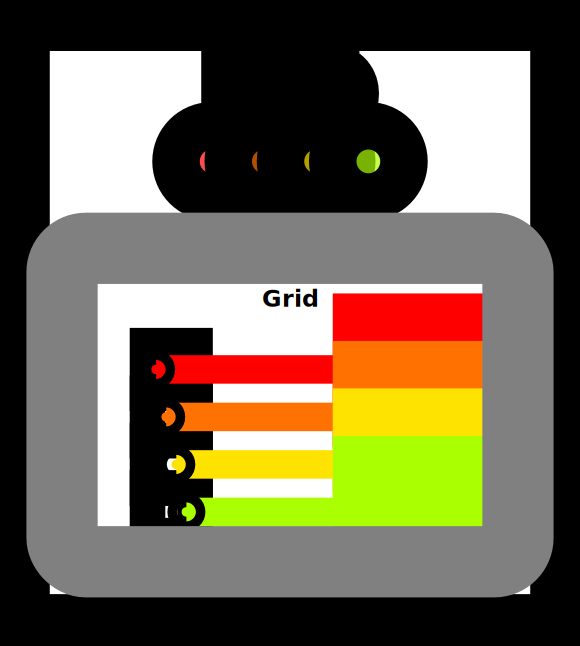

In [4]:
import mlx.core as mx
from utils import MetalKernel, MetalProblem

def map_spec(a: mx.array):
    return a + 10

def map_test(a: mx.array):
    source = """
        uint local_i = thread_position_in_grid.x;
        out[local_i] = a[local_i] + 10;
    """

    kernel = MetalKernel(
        name="map",
        input_names=["a"],
        output_names=["out"],
        source=source,
    )

    return kernel

SIZE = 4
a = mx.arange(SIZE)
output_shape = (SIZE,)

problem = MetalProblem(
    "Map",
    map_test,
    [a], 
    output_shape,
    grid=(SIZE,1,1), 
    spec=map_spec
)

problem.show()

In [5]:
problem.check()

Passed Tests!


### 2_ZIP

# Zip
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             2 |             1 |             0 |             0 | 
        


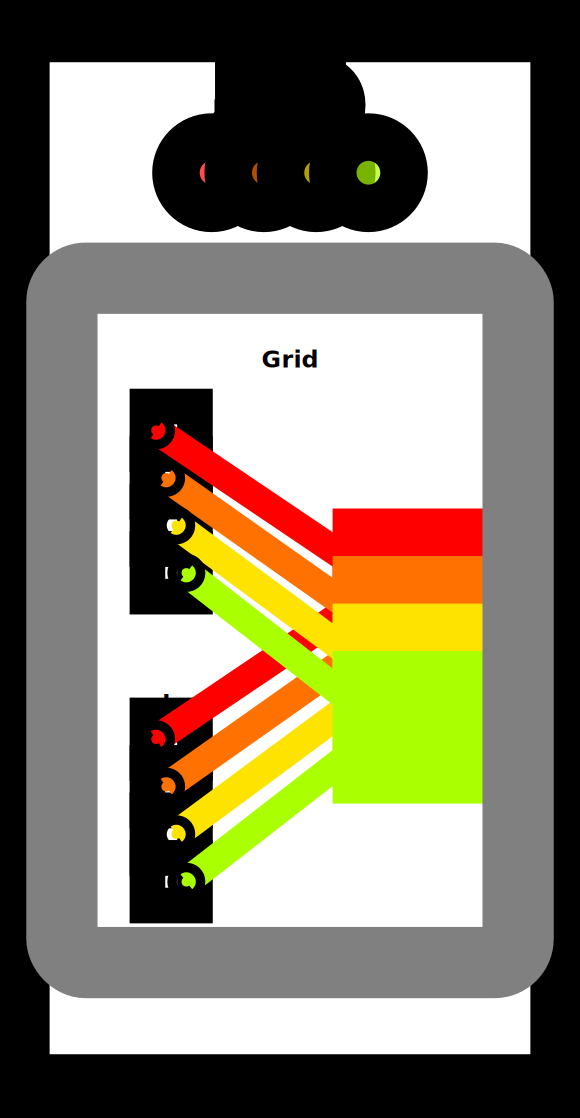

In [6]:
import mlx.core as mx
from utils import MetalKernel, MetalProblem

def zip_spec(a: mx.array, b: mx.array):
    return a + b

def zip_test(a: mx.array, b: mx.array):
    source = """
        uint local_i = thread_position_in_grid.x;
        out[local_i] = a[local_i] + b[local_i];
    """

    kernel = MetalKernel(
        name="zip",
        input_names=["a", "b"],
        output_names=["out"],
        source=source,
    )

    return kernel

SIZE = 4
a = mx.arange(SIZE)
b = mx.arange(SIZE)
output_shapes = (SIZE,)

problem = MetalProblem(
    "Zip",
    zip_test,
    [a, b],
    output_shapes,
    grid=(SIZE,1,1),
    spec=zip_spec
)
problem.show()

In [7]:
problem.check()

Passed Tests!


### 3_GUARD

# Guard
 
   Score (Max Per Thread):
   |  Global Reads | Global Writes |  Shared Reads | Shared Writes |
   |             1 |             1 |             0 |             0 | 
        


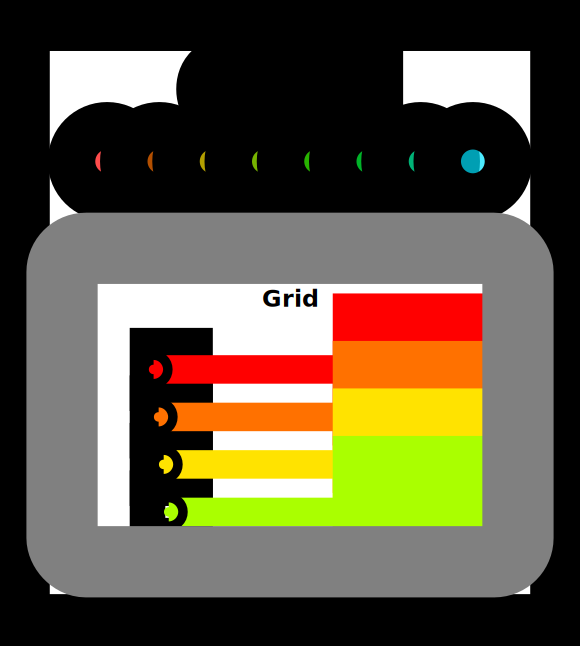

In [8]:
import mlx.core as mx
from utils import MetalKernel, MetalProblem


def map_spec(a: mx.array):
    return a + 10


def map_guard_test(a: mx.array):
    source = """
        uint local_i = thread_position_in_grid.x;
        if (local_i < a_shape[0]) {
            out[local_i] = a[local_i] + 10;
        }
    """

    kernel = MetalKernel(
        name="guard",
        input_names=["a"],
        output_names=["out"],
        source=source,
    )

    return kernel


SIZE = 4
a = mx.arange(SIZE)
output_shape = (SIZE,)

problem = MetalProblem(
    "Guard", map_guard_test, [a], output_shape, grid=(8, 1, 1), spec=map_spec
)
problem.show()